# Autoencoders

## ¿Qué es un Autoencoder?

Un autoencoder es una red neuronal que está entrenada para replicar su entrada en su salida. Tiene dos partes principales:

1. **Codificador:** Esta parte de la red comprime la entrada en una representación de menor dimensión llamada "espacio latente" o "código".
2. **Decodificador:** Esta parte toma el código del espacio latente y lo reconstruye en la entrada original.

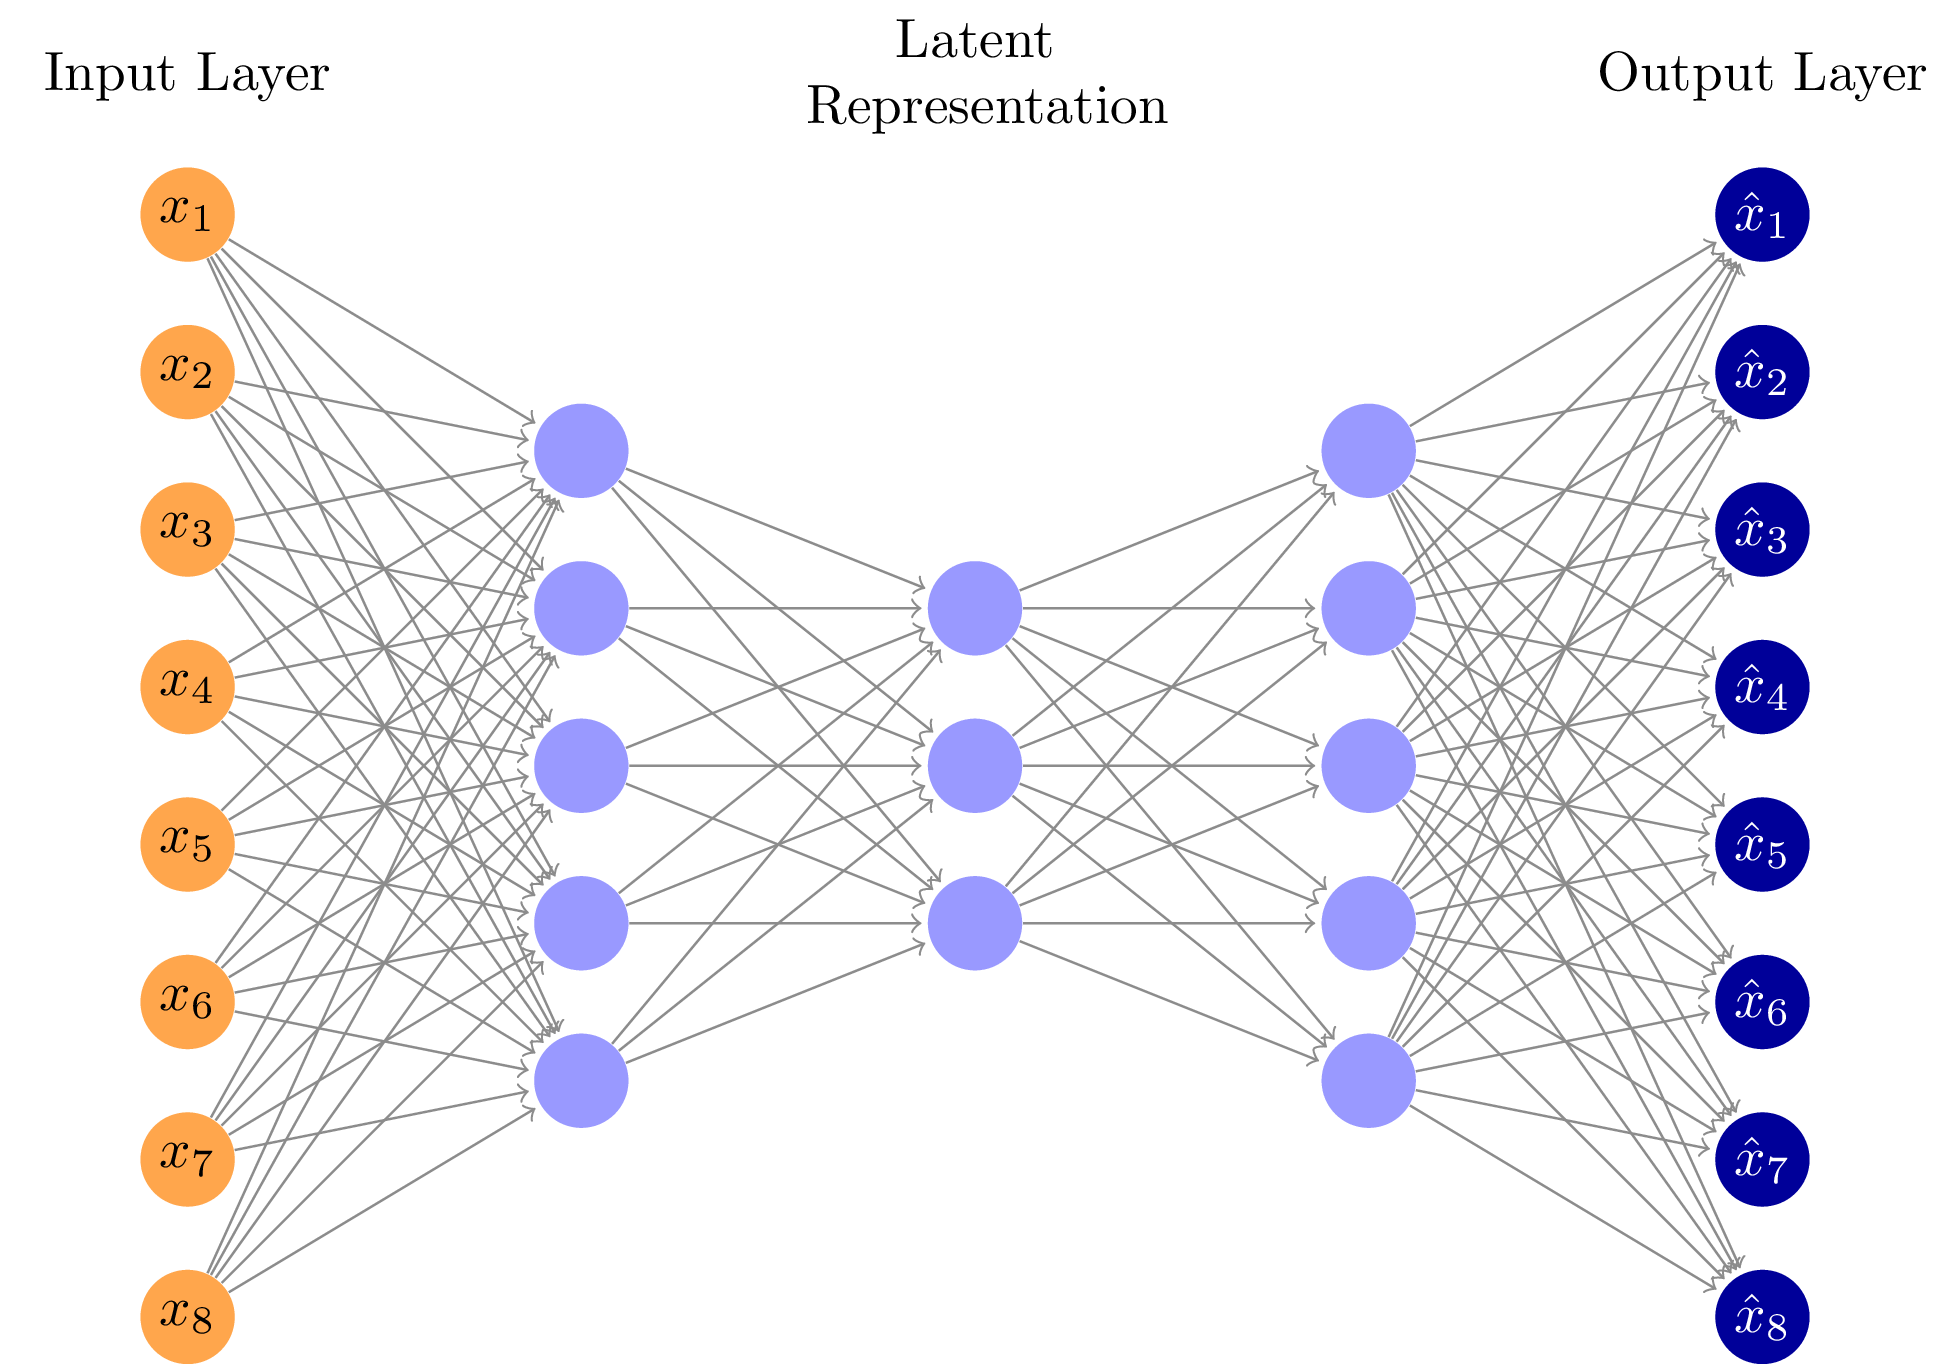

## Ejemplo con MNIST

En este ejemplo, se usa el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano. Se entrenará un autoencoder para reconstruir estas imágenes.

### Primero, se importan las bibliotecas necesarias:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Posteriormente se carga el conjunto de datos MNIST y se preprocesan las imágenes:

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalizar los valores de los píxeles a un rango de 0 a 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes en vectores de 784 píxeles
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


### Definición de la arquitectura del autoencoder:

In [ ]:
28*28

784

In [ ]:
# Tamaño del espacio latente
latent_dim = 32

# Capa de entrada
#input_img = Input(shape=(784,))
input_layer = keras.layers.Input(shape=(28, 28))

# Capa de codificación
codificador = keras.models.Sequential([input_layer,
                                       keras.layers.Flatten(),
                                       keras.layers.Dense(latent_dim,activation='relu')],
                                       name='codificador')

# Capa de decodificación
decodificador = keras.models.Sequential([keras.layers.Input(shape=(latent_dim,)),
                                         keras.layers.Dense(784,activation='sigmoid'),
                                         keras.layers.Reshape((28,28))],
                                         name='decodificador')

# Crear el modelo de autoencoder
autoencoder = keras.models.Sequential([codificador, decodificador],name='autoencoder')

In [ ]:
codificador.summary()

Model: "codificador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decodificador.summary()

Model: "decodificador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ codificador (Sequential)        │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decodificador (Sequential)      │ (None, 28, 28)         │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.summary(expand_nested=True)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ codificador (Sequential)        │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ flatten (Flatten)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense (Dense)              │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decodificador (Sequential)      │ (None, 28, 28)         │        25,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ dense_1 (Dense)            │ (None, 784)            │        25,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ reshape (Reshape)          │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
# Definición de hiperparametros
autoencoder.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy())

# Entrenamiento
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3175 - val_loss: 0.1604
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1502 - val_loss: 0.1250
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1223 - val_loss: 0.1099
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1093 - val_loss: 0.1020
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1020 - val_loss: 0.0977
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0982 - val_loss: 0.0953
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0962 - val_loss: 0.0941
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0952 - val_loss: 0.0935
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0947 - val_loss: 0.0931
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0944 - val_loss: 0.0928
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0940 - val_loss: 0.0927
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### Grafica de error

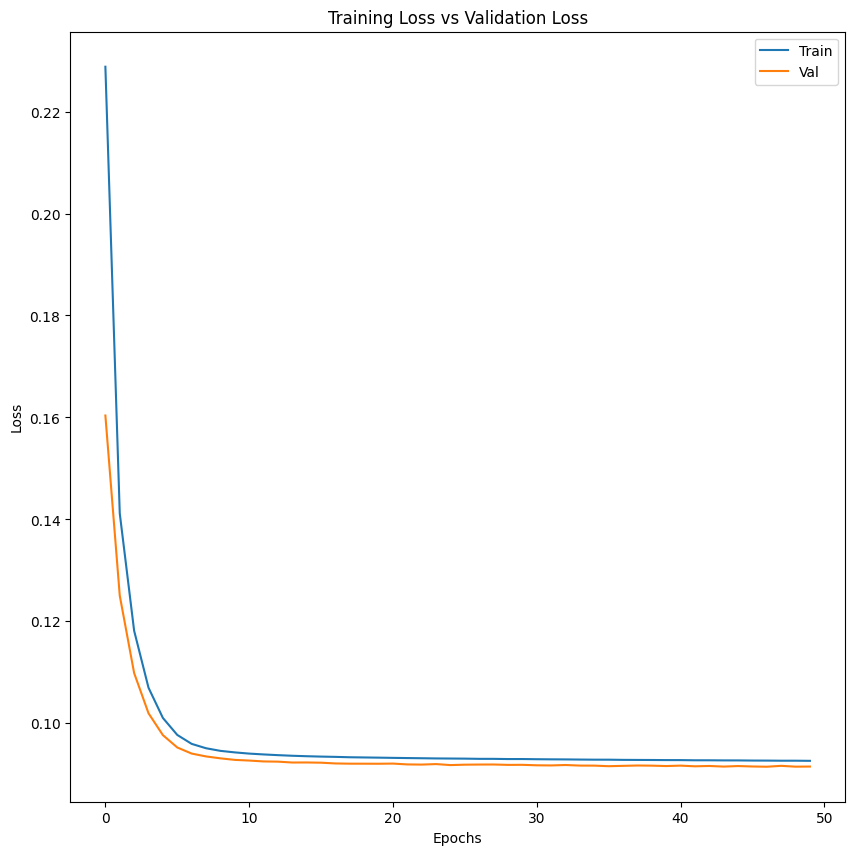

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

### Visualizando algunas muestras

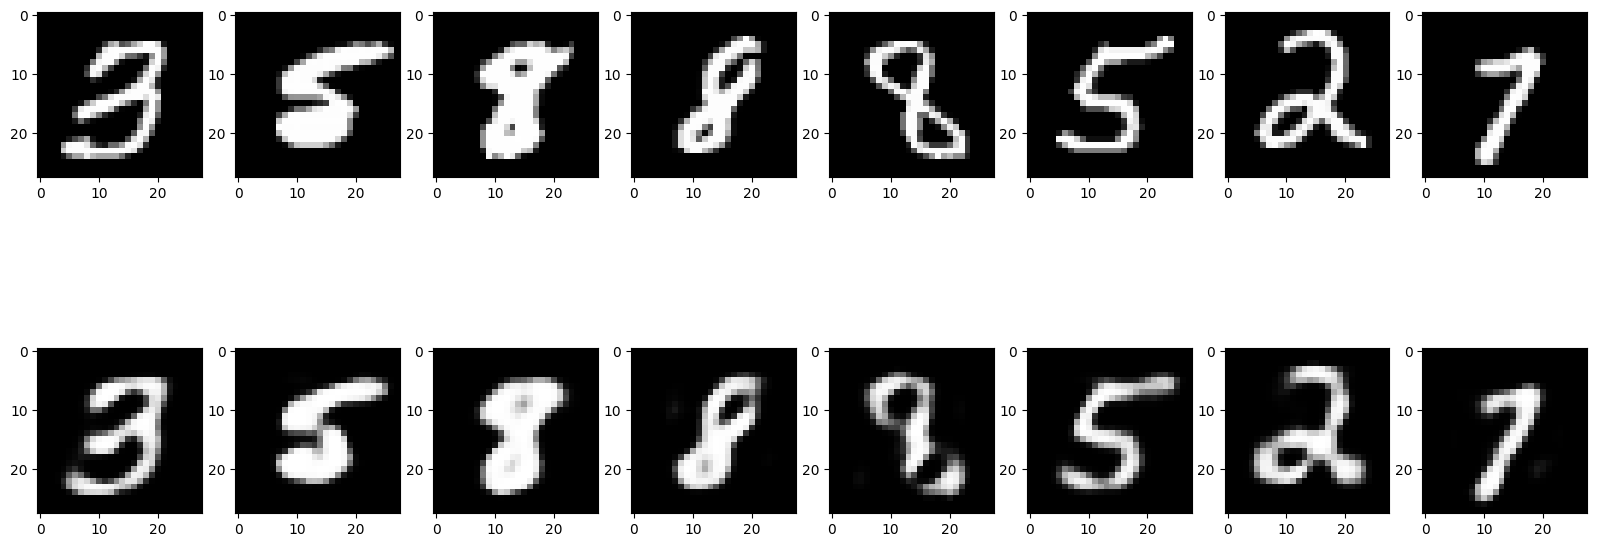

In [ ]:
fig, axs = plt.subplots(2,8,figsize=(20,8))
for i in range(8):
  sample1 = x_train[np.random.randint(0,x_train.shape[0])]
  axs[0][i].imshow(sample1, cmap = 'gray')
  axs[1][i].imshow(autoencoder(np.expand_dims(sample1,0))[0], cmap = 'gray')

## Para que entrenar una red que aprenda a predecir el mismo dato de entrada?

La respuesta a esta pregunta recae en los casos de aplicación. Los autoencoders, al tratarse de un modelo cuyo mecanismo de entrenamiento es no supervisado, no requieren de datos objetivo para su entrenamiento, es decir, solo requieren los datos de entrada. Esta caracteristica permite que sean utilizados en algunos escenarios o tareas en las que han dado muy buenos resultados.

* **Detección de anomalias.** Se entrena una red con datos normales para predecir estos mismos datos normales. En la implementación se presentan nuevos datos y se obtiene una metrica evaluando la predicción. Si el dato que ingresa es anomalo, la predicción del modelo falla en su reconstrucción entregando una metrica de baja similitud, permitiendo así identificar una anomalía.

* **Eliminación de ruido.** Se entrena un autoencoder con imagenes que contienen ruido, pero se utiliza como objetivo las mismas imagenes sin el ruido presente en ellas; de este modo la red se entrena para eliminar el ruido de las imagenes que son presentadas en la entrada.

* **Generación de nuevos datos.** Debido a la arquitectura y naturaleza de los autoencoder, otro campo de aplicación es la generación de datos de una misma categoría a partir de datos "aleatorios". En este caso, se entrena un autoencoder para predecir un dato similar al dato de entrada. La generación de un nuevo dato consiste en tomar el decodificador y presentarle un nuevo vector del espacio latente, de este modo, la aplicación utiliza solo la etapa de decodificación y no todo el autoencoder, generando nuevos datos a partir de vectores del espacio latente.

# Ejemplo de aplicación: Eliminación de ruido

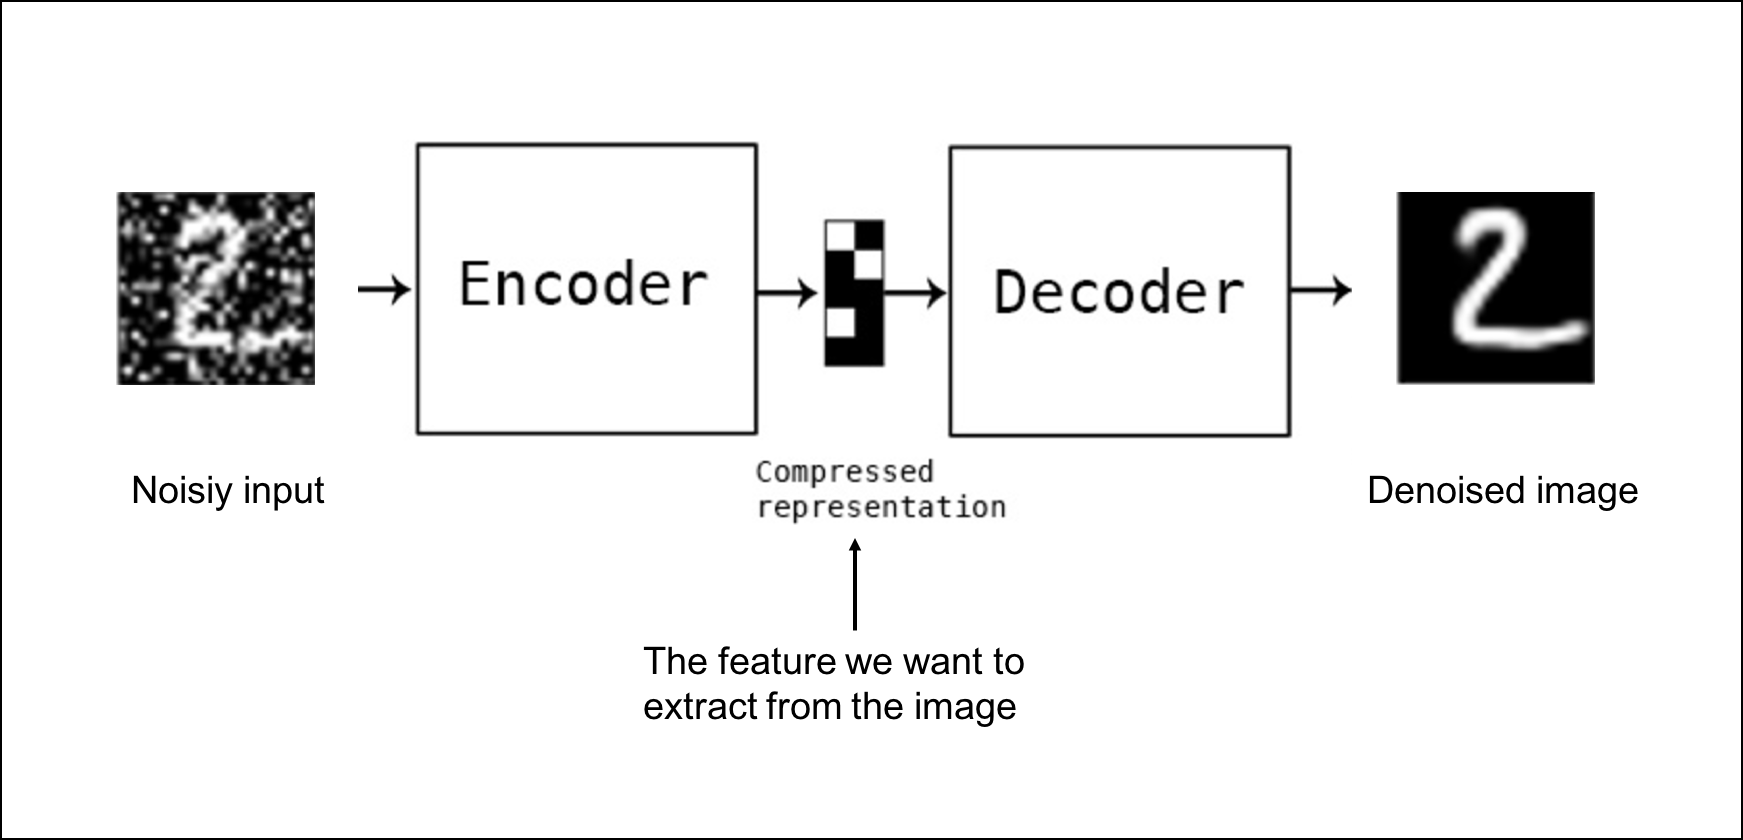

In [ ]:
# "Reinicio" del entorno
%reset  -f

### Primero, se importan las bibliotecas necesarias:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Posteriormente se carga el conjunto de datos Fashion MNIST y se preprocesan las imágenes:

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

# Normalizar los valores de los píxeles a un rango de 0 a 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Se agrega ruido a las imagenes

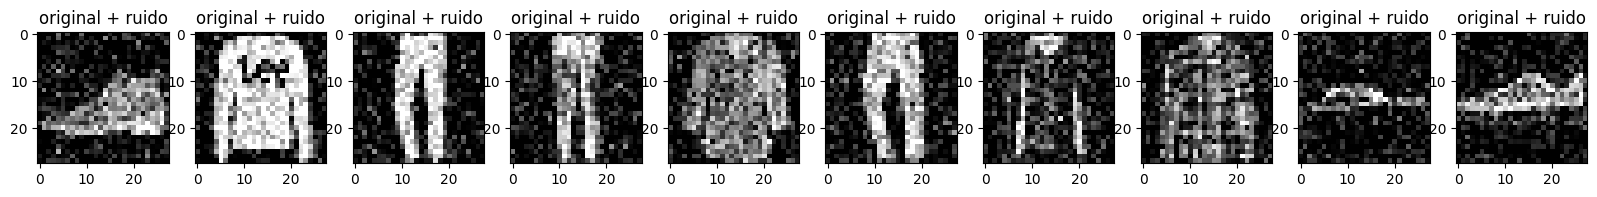

In [ ]:
# Se agrega un ruido aleatorio
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

# Se visualizan las primeras 10 imagenes del dataset con ruido
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + ruido")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Definición de la arquitectura del autoencoder:

In [ ]:
# Capa de entrada
input_layer = keras.layers.Input(shape=(28, 28,1))

# Capa de codificación
codificador = keras.models.Sequential([input_layer,
                                       keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
                                       keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)],
                                       name='codificador')
codificador.summary()

# Capa de decodificación
decodificador = keras.models.Sequential([keras.layers.Input(shape=(7, 7,8)),
                                         keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                                         keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                                         keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')],
                                         name='decodificador')
decodificador.summary()

# Crear el modelo de autoencoder
autoencoder = keras.models.Sequential([codificador, decodificador],name='autoencoder')
autoencoder.summary()
autoencoder.summary(expand_nested=True)

Model: "codificador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decodificador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ codificador (Sequential)        │ (None, 7, 7, 8)        │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decodificador (Sequential)      │ (None, 28, 28, 1)      │         1,897 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ codificador (Sequential)        │ (None, 7, 7, 8)        │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d (Conv2D)            │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_1 (Conv2D)          │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decodificador (Sequential)      │ (None, 28, 28, 1)      │         1,897 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose           │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_transpose_1         │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ conv2d_2 (Conv2D)          │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
# Definición de hiperparametros
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

# Entrenamiento
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=15,
                shuffle=True,
                batch_size=32,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 12/15
1875/1875 ━━━━

### Grafica de error

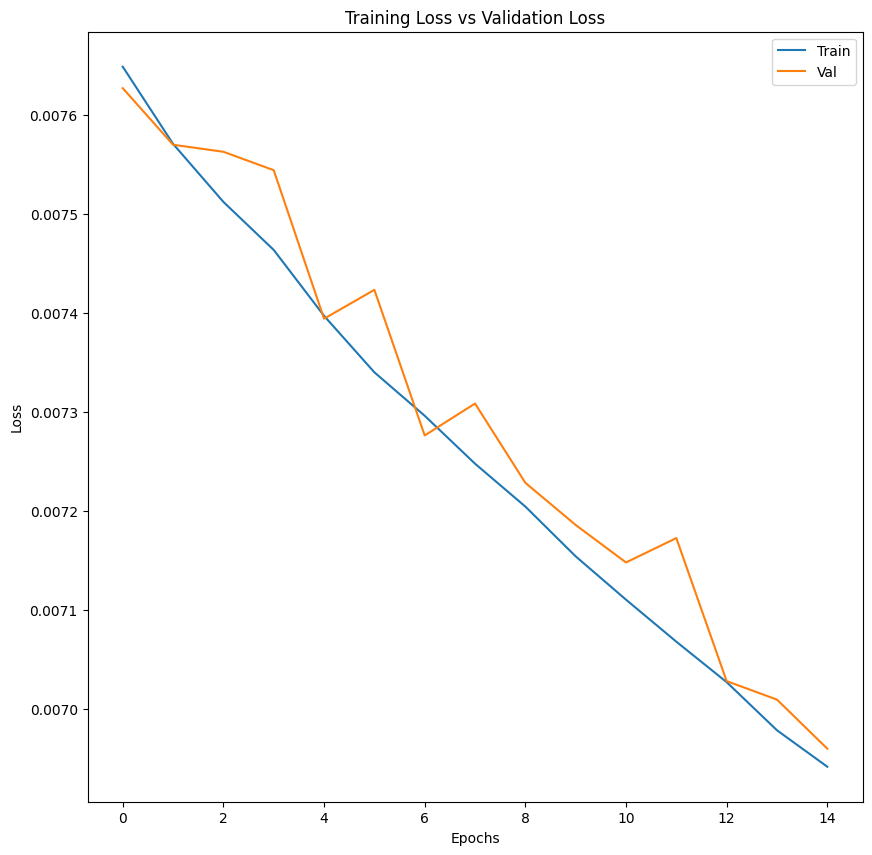

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

### Visualizando algunas muestras

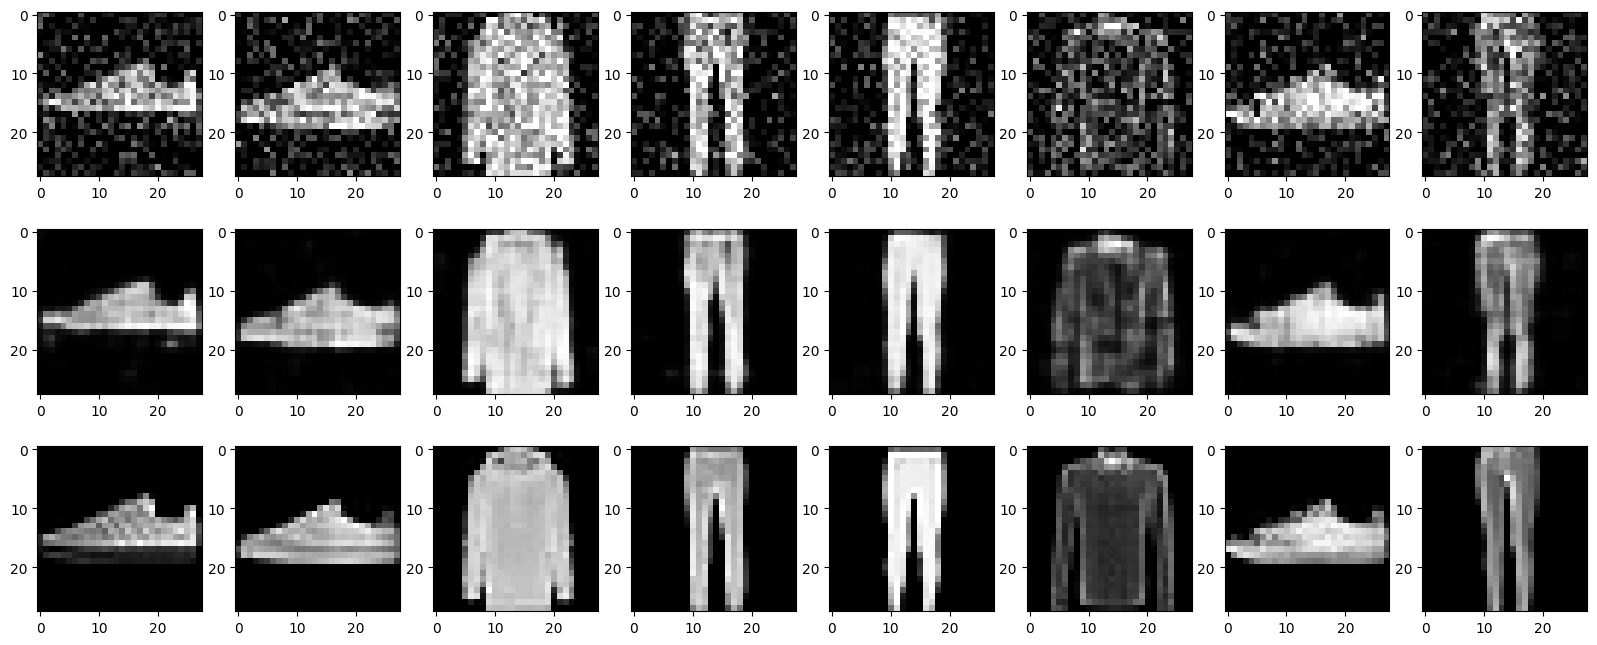

In [ ]:
fig, axs = plt.subplots(3,8,figsize=(20,8))
for i in range(8):
  pos = np.random.randint(0,x_train_noisy.shape[0])
  sample1 = x_train_noisy[pos]
  axs[0][i].imshow(sample1, cmap = 'gray')
  axs[1][i].imshow(autoencoder(np.expand_dims(sample1,0))[0], cmap = 'gray')
  axs[2][i].imshow(x_train[pos], cmap = 'gray')
